In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [4]:
df['sentiments'] = df['sentiment'].apply(lambda x:1 if x == 'positive' else 0)
df.head()

,review,sentiment,sentiments
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [5]:
X_train, X_test , y_train,y_test = train_test_split(df['review'],df['sentiments'], test_size=0.2 , random_state=1)

In [6]:
cv  = CountVectorizer()
print(cv)
X_cv = cv.fit_transform(X_train)
print(X_cv)

CountVectorizer()
  (0, 82770)	1
  (0, 30396)	1
  (0, 37275)	1
  (0, 8238)	1
  (0, 17187)	1
  (0, 83469)	8
  (0, 82503)	10
  (0, 38473)	1
  (0, 11525)	1
  (0, 16954)	1
  (0, 30690)	1
  (0, 12851)	1
  (0, 89606)	3
  (0, 3626)	1
  (0, 13020)	2
  (0, 72931)	1
  (0, 90722)	1
  (0, 58689)	1
  (0, 17782)	1
  (0, 30513)	1
  (0, 42841)	4
  (0, 54568)	1
  (0, 65803)	1
  (0, 58660)	1
  (0, 27675)	1
  :	:
  (39999, 41292)	1
  (39999, 52353)	1
  (39999, 31377)	1
  (39999, 47514)	1
  (39999, 33594)	1
  (39999, 75122)	1
  (39999, 45704)	1
  (39999, 37973)	1
  (39999, 45395)	1
  (39999, 49437)	1
  (39999, 68933)	1
  (39999, 18909)	1
  (39999, 26004)	1
  (39999, 43516)	1
  (39999, 71995)	1
  (39999, 19653)	1
  (39999, 50505)	1
  (39999, 61992)	1
  (39999, 79071)	1
  (39999, 25210)	1
  (39999, 32873)	1
  (39999, 412)	1
  (39999, 71988)	1
  (39999, 43500)	1
  (39999, 83648)	1


In [7]:
import scipy.sparse as sp

X_train_sparse = sp.csr_matrix(X_cv)

In [8]:
element = X_train_sparse[2, 5]

In [9]:
X_cv_test = cv.transform(X_test)
X_cv_test.shape

(10000, 93163)

In [10]:
model = MultinomialNB()

model.fit(X_train_sparse,y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(X_cv_test)


In [12]:
print("Classification Report : \n\n\n ", classification_report(y_test , y_pred))

Classification Report : 


                precision    recall  f1-score   support

           0       0.83      0.88      0.86      5044
           1       0.87      0.82      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

In [14]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4462,  582],
       [ 901, 4055]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

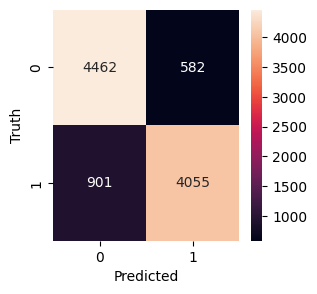

In [15]:
%matplotlib inline

plt.figure(figsize=(3,3))
sn.heatmap(cm, annot=True ,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr_bow_score=accuracy_score(y_test,y_pred)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8517
